# Prática 1

## Modelos Lineares Generalizados

***Estatística para Ciência de Dados***

por **Cibele Russo** (ICMC/USP - São Carlos SP)

**MBA em Ciências de Dados**

## Modelo para óbitos por COVID-19

Na base de dados comorbidades.csv, são apresentados dados reais de uma amostra obtida do seade-R (Fonte dos dados originais: https://github.com/seade-R/dados-covid-sp). Estão disponíveis as seguintes informações:

- Identificação do paciente
- Município
- Código do IBGE
- Idade
- Sexo (1: feminino, 0: masculino)
- Óbito (1: sim, 0: não)
- Comorbidades: asma, cardiopatia, diabetes, doença hematológica, doença renal, doença hepática, doença neurológica, imumodepressão, obesidade, outros fatores de risco, pneumopatia, puérpera, síndrome de down (para cada uma delas 1: presente, 0: ausente)

Os dados faltantes foram excluídos da base original para esta análise específica, considerando que essa exclusão não afeta a representatividade da amostra.

Desenvolva uma análise exploratória para investigar a associação entre idade e óbito, e repita para sexo e óbito. 


Ajuste um modelo de regressão logística com intercepto, considerando as preditoras sexo, idade, asma, cardiopatia, diabetes, doenca_renal, obesidade.


In [3]:
import numpy as np
import statsmodels.api as sm
from scipy import stats
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
import seaborn as sns 
%matplotlib inline



In [4]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split

# Indique o seu diretório se necessário
#pkgdir = '/home/cibele/Google Drive/MBA/ECD/Data'

# Dados banco - Leitura dos dados
#dados = pd.read_csv(f'{pkgdir}/comorbidades.csv', index_col=0)

dados = pd.read_csv('comorbidades.csv', index_col=0)
dados.head()

,nome_munic,codigo_ibge,idade,sexo,obito,asma,cardiopatia,diabetes,doenca_hematologica,doenca_hepatica,doenca_neurologica,doenca_renal,imunodepressao,obesidade,outros_fatores_de_risco,pneumopatia,puerpera,sindrome_de_down
66,Ferraz de Vasconcelos,3515707,86,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0
97,São Paulo,3550308,62,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
100,São José dos Campos,3549904,58,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0
207,Mauá,3529401,54,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0
249,Cajamar,3509205,62,0,1,0,1,1,0,0,0,0,0,1,0,0,0,0


### Ajustando um MLG com resposta binária com intercepto

#### Considere a divisão da base em treinamento e teste, deixando 20% das observações para teste

In [5]:
# Adicionar uma coluna de uns referente ao intercepto

n=len(dados)
dados.loc[:,'const']  = np.ones(n).reshape(n,1)


In [6]:
dados_treino, dados_teste = train_test_split(dados,train_size = 0.8,random_state=3)

In [7]:
preditoras = dados_treino[['const','idade','sexo','asma','cardiopatia','diabetes','doenca_renal', 'obesidade']]
resposta = dados_treino[['obito']]

In [8]:
glm_binom = sm.GLM(resposta, preditoras, family=sm.families.Binomial())
res = glm_binom.fit()
print(res.summary())


                 Generalized Linear Model Regression Results                  
Dep. Variable:                  obito   No. Observations:                  945
Model:                            GLM   Df Residuals:                      937
Model Family:                Binomial   Df Model:                            7
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -575.28
Date:                Mon, 23 May 2022   Deviance:                       1150.6
Time:                        00:48:54   Pearson chi2:                     941.
No. Iterations:                     4                                         
Covariance Type:            nonrobust                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -3.3762      0.351     -9.609   

In [9]:
ajustado = res.predict(preditoras)


In [10]:
X_teste = dados_teste[['const','idade','sexo','asma','cardiopatia','diabetes','doenca_renal', 'obesidade']]
Y_teste = dados_teste[['obito']]

predito = res.predict(X_teste)


In [11]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
mean_squared_error(predito, Y_teste)


0.1993304697252316

In [12]:
res.aic

1166.5619547074634

**Segundo modelo, excluindo cardiopatia**

In [13]:
preditoras = dados_treino[['const','idade','sexo','asma','diabetes','doenca_renal', 'obesidade']]
resposta = dados_treino[['obito']]

In [14]:
glm_binom = sm.GLM(resposta, preditoras, family=sm.families.Binomial())
res = glm_binom.fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  obito   No. Observations:                  945
Model:                            GLM   Df Residuals:                      938
Model Family:                Binomial   Df Model:                            6
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -575.34
Date:                Mon, 23 May 2022   Deviance:                       1150.7
Time:                        00:48:54   Pearson chi2:                     942.
No. Iterations:                     4                                         
Covariance Type:            nonrobust                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -3.3807      0.351     -9.625   

In [15]:
ajustado = res.predict()

In [16]:
X_teste = dados_teste[['const','idade','sexo','asma','diabetes','doenca_renal', 'obesidade']]
Y_teste = dados_teste[['obito']]

predito = res.predict(X_teste)


In [17]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
mean_squared_error(predito, Y_teste)

0.19943538803697025

In [18]:
res.aic

1164.6752349551355

**Terceiro modelo, excluindo asma**

In [19]:
preditoras = dados_treino[['const','idade','sexo','diabetes','doenca_renal', 'obesidade']]
resposta = dados_treino[['obito']]


In [20]:
glm_binom = sm.GLM(resposta, preditoras, family=sm.families.Binomial())
res = glm_binom.fit()
print(res.summary())


                 Generalized Linear Model Regression Results                  
Dep. Variable:                  obito   No. Observations:                  945
Model:                            GLM   Df Residuals:                      939
Model Family:                Binomial   Df Model:                            5
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -575.72
Date:                Mon, 23 May 2022   Deviance:                       1151.4
Time:                        00:48:55   Pearson chi2:                     942.
No. Iterations:                     4                                         
Covariance Type:            nonrobust                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -3.3842      0.351     -9.651   

In [21]:
ajustado = res.predict()



In [22]:
X_teste = dados_teste[['const','idade','sexo','diabetes','doenca_renal', 'obesidade']]
Y_teste = dados_teste[['obito']]

predito = res.predict(X_teste)

In [23]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
mean_squared_error(predito, Y_teste)


0.19962241839836906

In [24]:
res.aic

1163.430212617864

**Quarto modelo, excluindo sexo**


In [25]:
preditoras = dados_treino[['const','idade','diabetes','doenca_renal', 'obesidade']]
resposta = dados_treino[['obito']]



In [26]:
glm_binom = sm.GLM(resposta, preditoras, family=sm.families.Binomial())
res = glm_binom.fit()
print(res.summary())


ajustado = res.predict()


                 Generalized Linear Model Regression Results                  
Dep. Variable:                  obito   No. Observations:                  945
Model:                            GLM   Df Residuals:                      940
Model Family:                Binomial   Df Model:                            4
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -576.23
Date:                Mon, 23 May 2022   Deviance:                       1152.5
Time:                        00:48:55   Pearson chi2:                     942.
No. Iterations:                     4                                         
Covariance Type:            nonrobust                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -3.4253      0.348     -9.834   

Note que a significância marginal das preditoras que ficaram muda em relação aos modelos anteriores.
Neste momento paramos as exclusões e vamos manter as preditoras.

In [27]:
X_teste = dados_teste[['const','idade','diabetes','doenca_renal', 'obesidade']]
Y_teste = dados_teste[['obito']]

predito = res.predict(X_teste)


In [28]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
mean_squared_error(predito, Y_teste)


0.2000601841534481

In [29]:
res.aic

1162.4668937333215

**Análise de diagnóstico para o modelo "final", agora com a base toda**

In [30]:
preditoras = dados[['const','idade','diabetes','doenca_renal', 'obesidade']]
resposta = dados[['obito']]

In [31]:
glm_binom = sm.GLM(resposta, preditoras, family=sm.families.Binomial())
res = glm_binom.fit()
ajustado = res.predict()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  obito   No. Observations:                 1182
Model:                            GLM   Df Residuals:                     1177
Model Family:                Binomial   Df Model:                            4
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -716.15
Date:                Mon, 23 May 2022   Deviance:                       1432.3
Time:                        00:48:55   Pearson chi2:                 1.21e+03
No. Iterations:                     4                                         
Covariance Type:            nonrobust                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -3.5240      0.315    -11.194   

Qual a interpretação dos parâmetros?

Podemos fazê-la com a razão de chances. 

Exemplo: 

- Para a preditora obesidade, $\exp(0.6268) = 1.87$, o que indica um aumento de 87% na chance de óbito para pacientes com obesidade em relação a pacientes que não apresentam essa característica.  

**Alguns códigos para a análise de diagnóstico.**

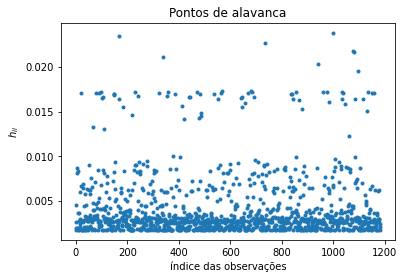

In [32]:
# Gráfico de pontos de alavanca

fig, ax = plt.subplots()

plt.plot(res.get_hat_matrix_diag(), '.')

ax.set_title('Pontos de alavanca')
ax.set_ylabel('$h_{ii}$')
ax.set_xlabel('índice das observações');

plt.show()


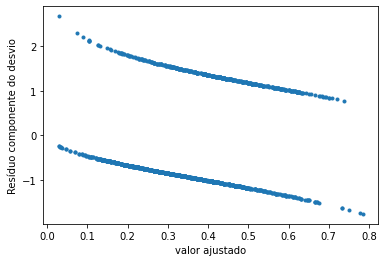

In [33]:
# Gráfico de Resíduo Componente do desvio

fig, ax = plt.subplots()
plt.plot(ajustado,res.resid_deviance,  '.')


ax.set_ylabel('Resíduo componente do desvio')
ax.set_xlabel('valor ajustado');

plt.show()


In [34]:
# x and y given as DataFrame columns
import plotly.express as px

fig = px.scatter(x = ajustado, y=res.resid_deviance)
fig.show()